# Machine Learning
 
 - É um processo que explora e analisa grandes volumes de dados em busca de padrões, previsões, erros, associações, entre outros.
 - Aprendizado contínuo: com mais dados, o computador pode melhorar seu modelo
 - Aprendizado mensurável: pode ser medido o quanto o computador aprendeu
 
 ## Tarefas
 
  ### 1. Classificação
  
   - A partir de dados ja existentes, tenta prever qual a classificação de um novo dado
   - Descreve ou preve um atributo do atributo classe
   - Usado para prever uma fraude, descobrir qual espécime um animal pertence, prever uma doença, classificar um tipo de fungo, etcs.
   - Overfiting: quando o modelo tem uma alta taixa de acerto para uma base de dados especifica, e quando submetida a outra, a taixa cai; como se o modelo tivesse "decorado" os dados, envés de aprendido
     - Causas
       - Dados não representativos
       - Dados não significativo
       - Forma de treinamento
       - Modelo incorreto
       - Classe rara → quando nos dados há um desbalanceamento da classe. Existe muito mais dados o qual o algoritomo possa prever para um tipo expecifico, quando para outro, não
   - Modelos genéricos: modelos com desenpenhos similares entre diferentes base de dados
   - Algoritimos
     - Árvores de decisão 
     - Regras
     - Naïve bayes
     - Redes Bayesianas
     - Redes neurais artificiais e deep learning
     - Maquina de vetor de suporte
     - Métodos de grupos
     - Aprendizado baseado em instância (KNN)
   
   #### 1.1 Naïve Bayes

In [1]:
import pandas as pandas
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
credito = pandas.read_csv("data/Credit.csv")
credito.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,'critical/other existing credit',radio/tv,1169,'no known savings',>=7,4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,'existing paid',radio/tv,5951,<100,1<=X<4,2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,<100,4<=X<7,2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,<0,42,'existing paid',furniture/equipment,7882,<100,4<=X<7,2,'male single',guarantor,...,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,<0,24,'delayed previously','new car',4870,<100,1<=X<4,3,'male single',none,...,'no known property',53,none,'for free',2,skilled,2,none,yes,bad


In [3]:
previsores = credito.iloc[:,0:20].values
previsores[:6]

array([['<0', 6, "'critical/other existing credit'", 'radio/tv', 1169,
        "'no known savings'", '>=7', 4, "'male single'", 'none', 4,
        "'real estate'", 67, 'none', 'own', 2, 'skilled', 1, 'yes',
        'yes'],
       ['0<=X<200', 48, "'existing paid'", 'radio/tv', 5951, '<100',
        '1<=X<4', 2, "'female div/dep/mar'", 'none', 2, "'real estate'",
        22, 'none', 'own', 1, 'skilled', 1, 'none', 'yes'],
       ["'no checking'", 12, "'critical/other existing credit'",
        'education', 2096, '<100', '4<=X<7', 2, "'male single'", 'none',
        3, "'real estate'", 49, 'none', 'own', 1, "'unskilled resident'",
        2, 'none', 'yes'],
       ['<0', 42, "'existing paid'", 'furniture/equipment', 7882, '<100',
        '4<=X<7', 2, "'male single'", 'guarantor', 4, "'life insurance'",
        45, 'none', "'for free'", 1, 'skilled', 2, 'none', 'yes'],
       ['<0', 24, "'delayed previously'", "'new car'", 4870, '<100',
        '1<=X<4', 3, "'male single'", 'none', 4, "'n

In [4]:
classe = credito.iloc[:,20].values
classe[:6]

array(['good', 'bad', 'good', 'good', 'bad', 'good'], dtype=object)

In [5]:
# transformando as variáveis nominais em numéricas
labelEncoder = LabelEncoder()
previsores[:,0] = labelEncoder.fit_transform(previsores[:,0])
previsores[:,2] = labelEncoder.fit_transform(previsores[:,2])
previsores[:,3] = labelEncoder.fit_transform(previsores[:,3])
previsores[:,5] = labelEncoder.fit_transform(previsores[:,5])
previsores[:,6] = labelEncoder.fit_transform(previsores[:,6])
previsores[:,8] = labelEncoder.fit_transform(previsores[:,8])
previsores[:,9] = labelEncoder.fit_transform(previsores[:,9])
previsores[:,11] = labelEncoder.fit_transform(previsores[:,11])
previsores[:,13] = labelEncoder.fit_transform(previsores[:,13])
previsores[:,14] = labelEncoder.fit_transform(previsores[:,14])
previsores[:,16] = labelEncoder.fit_transform(previsores[:,16])
previsores[:,18] = labelEncoder.fit_transform(previsores[:,18])
previsores[:,19] = labelEncoder.fit_transform(previsores[:,19])

In [6]:
df = pandas.DataFrame(previsores)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,2,6,1,7,1169,0,3,4,3,2,4,2,67,1,1,2,3,1,1,1
1,1,48,3,7,5951,3,0,2,0,2,2,2,22,1,1,1,3,1,0,1
2,0,12,1,4,2096,3,1,2,3,2,3,2,49,1,1,1,2,2,0,1
3,2,42,3,5,7882,3,1,2,3,1,4,0,45,1,0,1,3,2,0,1
4,2,24,2,1,4870,3,0,3,3,2,4,1,53,1,0,2,3,2,0,1


In [7]:
df.columns = credito.columns[:20]
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
0,2,6,1,7,1169,0,3,4,3,2,4,2,67,1,1,2,3,1,1,1
1,1,48,3,7,5951,3,0,2,0,2,2,2,22,1,1,1,3,1,0,1
2,0,12,1,4,2096,3,1,2,3,2,3,2,49,1,1,1,2,2,0,1
3,2,42,3,5,7882,3,1,2,3,1,4,0,45,1,0,1,3,2,0,1
4,2,24,2,1,4870,3,0,3,3,2,4,1,53,1,0,2,3,2,0,1


In [8]:
x_treinamento, x_teste, y_treinamento, y_test = train_test_split(previsores,
                                                                 classe,
                                                                 test_size=0.3,
                                                                 random_state=0)

In [9]:
x_treinamento[:6]

array([[1, 24, 1, 6, 11938, 3, 0, 2, 3, 0, 3, 3, 39, 1, 1, 2, 0, 2, 1, 1],
       [0, 36, 3, 4, 1819, 3, 0, 4, 3, 2, 4, 1, 37, 2, 0, 1, 3, 1, 1, 1],
       [2, 15, 1, 5, 1478, 3, 3, 4, 3, 2, 4, 3, 44, 1, 1, 2, 3, 2, 1, 1],
       [0, 24, 1, 7, 1516, 4, 0, 4, 0, 2, 1, 2, 43, 1, 1, 2, 2, 1, 0, 1],
       [2, 9, 3, 5, 2136, 3, 0, 3, 3, 2, 2, 2, 25, 1, 1, 1, 3, 1, 0, 1],
       [0, 15, 3, 2, 3812, 1, 2, 1, 0, 2, 4, 3, 23, 1, 1, 1, 3, 1, 1, 1]],
      dtype=object)

In [10]:
y_treinamento[:6]

array(['bad', 'bad', 'good', 'good', 'good', 'good'], dtype=object)

In [11]:
print(x_treinamento.shape)
print(y_treinamento.shape)
print(x_teste.shape)
print(y_test.shape)

(700, 20)
(700,)
(300, 20)
(300,)


In [12]:
naive_bayes = GaussianNB()
naive_bayes.fit(x_treinamento, y_treinamento)

GaussianNB(priors=None, var_smoothing=1e-09)

In [13]:
previsoes = naive_bayes.predict(x_teste)
previsoes[:10]

array(['bad', 'good', 'good', 'good', 'bad', 'good', 'good', 'good',
       'good', 'bad'], dtype='<U4')

In [14]:
confusao = confusion_matrix(y_test, previsoes)
confusao
# 45 falsos negativos
# 42 falsos positivos

array([[ 41,  45],
       [ 42, 172]])

In [15]:
taxe_de_acerto = accuracy_score(y_test, previsoes)
taxe_de_acerto

0.71

   #### 1.2 Árvore de decisão

In [16]:
from sklearn.tree import DecisionTreeClassifier

In [17]:
tree = DecisionTreeClassifier()
tree.fit(x_treinamento, y_treinamento)
previsoes = tree.predict(x_teste)
previsoes[:7]

array(['bad', 'bad', 'good', 'good', 'good', 'bad', 'good'], dtype=object)

In [18]:
confusao = confusion_matrix(y_test, previsoes)
confusao

array([[ 44,  42],
       [ 62, 152]])

In [19]:
taxe_de_acerto = accuracy_score(y_test, previsoes)
taxe_de_acerto

0.6533333333333333

   #### 1.3 SVM

In [20]:
from sklearn.svm import SVC 
from sklearn.ensemble import ExtraTreesClassifier

In [21]:
svm = SVC()
svm.fit(x_treinamento, y_treinamento)
previsoes = svm.predict(x_teste)
taxa_de_acerto = accuracy_score(y_test, previsoes)
taxa_de_acerto

/home/obi-wan/python_environments/jupyter/lib/python3.5/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.7133333333333334

In [22]:
confusao = confusion_matrix(y_test, previsoes)
confusao

array([[  0,  86],
       [  0, 214]])

In [23]:
# verificando importancia dos atributos
forest = ExtraTreesClassifier()
forest.fit(x_treinamento, y_treinamento)
importancias = forest.feature_importances_
importancias

/home/obi-wan/python_environments/jupyter/lib/python3.5/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([0.11274462, 0.07069078, 0.06166154, 0.05792549, 0.07050782,
       0.05142755, 0.0514042 , 0.05787669, 0.04289095, 0.02523576,
       0.04628047, 0.0531072 , 0.07003021, 0.03738113, 0.04290439,
       0.03979327, 0.04032886, 0.0236304 , 0.03410345, 0.01007522])

In [24]:
x_train2 = x_treinamento[:,0:4]
x_teste2 = x_teste[:,0:4]

In [25]:
svm2 = SVC()
svm2.fit(x_train2, y_treinamento)
previsoes2 = svm2.predict(x_teste2)
taxa_de_acerto2 = accuracy_score(y_test, previsoes2)
taxa_de_acerto2

/home/obi-wan/python_environments/jupyter/lib/python3.5/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.7266666666666667

In [26]:
confusao = confusion_matrix(y_test, previsoes2)
confusao

array([[ 24,  62],
       [ 20, 194]])

   #### 1.4 KNN

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
from scipy import stats

In [28]:
iris = datasets.load_iris()
stats.describe(iris.data)

DescribeResult(nobs=150, minmax=(array([4.3, 2. , 1. , 0.1]), array([7.9, 4.4, 6.9, 2.5])), mean=array([5.84333333, 3.05733333, 3.758     , 1.19933333]), variance=array([0.68569351, 0.18997942, 3.11627785, 0.58100626]), skewness=array([ 0.31175306,  0.31576711, -0.27212767, -0.10193421]), kurtosis=array([-0.57356795,  0.18097632, -1.39553589, -1.33606741]))

In [29]:
previsores = iris.data
classe = iris.target

In [30]:
previsores

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [31]:
classe

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [32]:
x_treinamento2, x_test2, y_treinamento2, y_test2 = train_test_split(previsores, classe,
                                                                test_size=0.3,
                                                                random_state=0)

In [33]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_treinamento2, y_treinamento2)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [34]:
previsoes = knn.predict(x_test2)
confusao = confusion_matrix(y_test2, previsoes)
taxa_de_acerto = accuracy_score(y_test2, previsoes)

In [35]:
confusao

array([[16,  0,  0],
       [ 0, 17,  1],
       [ 0,  0, 11]])

In [36]:
taxa_de_acerto

0.9777777777777777

   #### 1.5 Random Forest

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
forest = RandomForestClassifier(n_estimators=100)
forest.fit(x_treinamento, y_treinamento)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [39]:
previsoes = forest.predict(x_teste)
confusao = confusion_matrix(y_test, previsoes)
taxa_acerto = accuracy_score(y_test, previsoes)

In [40]:
confusao

array([[ 38,  48],
       [ 16, 198]])

In [41]:
taxa_acerto

0.7866666666666666

In [42]:
# visualizando as arvores
forest.estimators_[1]

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False,
            random_state=827310739, splitter='best')

  ### 2. Agrupamento
  
   - Organiza as instâncias dos dados em grupos, a partir de alguma relação matemática
   - Não existe classe, não procura prever nada.
   - Exemplo: identificar grupos de clientes e direcionar campanhas de marketing específicas
   - Tipos
     - Agrupamento completo: cada elemento pertence apenas a um grupo
     - Agrupamento parcial: cada elemento pode pertencer a mais de um grupo
     - Modelo difuso → cada elemento pertence a um grupo segundo alguma probabilidade
     - Modelo hierárquico: permite que grupos tenham subgrupos
   - Pode ser que todo os elementos sejam colocados em grupos, como também poder ser que alguns elementos fiquem de fora(ruídos)
   - Algoritimos
     - K-Means -> agrupa todos os lementos
     - K-Medoid → agrupa todos os elementos
     - Dbscan → pode não agrupar todos elementos, deixando ruidos de fora
   
   #### 2.1 K-Means

In [43]:
from sklearn import datasets
import numpy
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans

In [44]:
iris = datasets.load_iris()
unicos, quantidade = numpy.unique(iris.target, return_counts = True)
quantidade

array([50, 50, 50])

In [45]:
unicos

array([0, 1, 2])

In [46]:
cluester = KMeans(n_clusters=3)
cluester.fit(iris.data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [47]:
centroides = cluester.cluster_centers_
centroides

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [48]:
previsoes = cluester.labels_
previsoes

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [49]:
unicos2, quantidade2 = numpy.unique(previsoes, return_counts = True)
quantidade2

array([62, 50, 38])

In [50]:
resultados = confusion_matrix(iris.target, previsoes)
resultados

array([[ 0, 50,  0],
       [48,  0,  2],
       [14,  0, 36]])

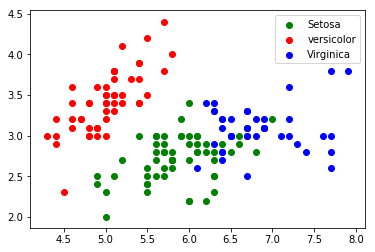

In [51]:
plt.scatter(iris.data[previsoes == 0, 0], iris.data[previsoes == 0, 1],
            c='green', label='Setosa')
plt.scatter(iris.data[previsoes == 1, 0], iris.data[previsoes == 1, 1],
            c='red', label='versicolor')
plt.scatter(iris.data[previsoes == 2, 0], iris.data[previsoes == 2, 1],
            c='blue', label='Virginica')

plt.legend()